In [49]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [50]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# مسیر پوشه‌ای که داده‌ها داخلش هستند
data_path = "/Users/arsi/coding_jupyter_notebook/ml_modeling/cifar-10-batches-py"


X_train = []
y_train = []

for i in range(1, 6): 
    batch = unpickle(f"{data_path}/data_batch_{i}")  # باز کردن فایل
    X_train.append(batch[b"data"])  # گرفتن داده‌های تصویری
    y_train += batch[b"labels"]  # گرفتن لیبل‌ها

# تبدیل به آرایه‌ی NumPy
X_train = np.concatenate(X_train).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # تبدیل به شکل (samples, 32, 32, 3)
y_train = np.array(y_train)

# خواندن داده‌های تست از test_batch
test_batch = unpickle(f"{data_path}/test_batch")
X_test = test_batch[b"data"].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
y_test = np.array(test_batch[b"labels"])


print(f"x_train shape: {X_train.shape}")  # باید (50000, 32, 32, 3) باشد
print(f"y_train shape: {y_train.shape}")  # باید (50000,) باشد
print(f"x_test shape: {X_test.shape}")    # باید (10000, 32, 32, 3) باشد
print(f"y_test shape: {y_test.shape}")    # باید (10000,) باشد

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000,)


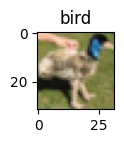

In [51]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample(index): 
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])
    plt.title(classes[y_train[index]])

plot_sample(1003)

In [56]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000, activation = 'relu'),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')
])


model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [77]:
model.fit(X_train_scaled, y_train_categorical, epochs = 20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3029 - loss: 1.9366
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4160 - loss: 1.6525
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4503 - loss: 1.5570
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4783 - loss: 1.4887
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4924 - loss: 1.4332
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5057 - loss: 1.4029
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5238 - loss: 1.3569
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5395 - loss: 1.3160
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5465 - loss: 1.2909
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5586 - loss: 1.2551
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5743 - loss: 1.2132
Epoch 12/20
1563/1

In [87]:
classes[np.argmax(model.predict(X_test_scaled)[1210])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


'airplane'

In [88]:
classes[y_test[1210]]

'airplane'